Davies-Bouldin Index: 0.917539475349112


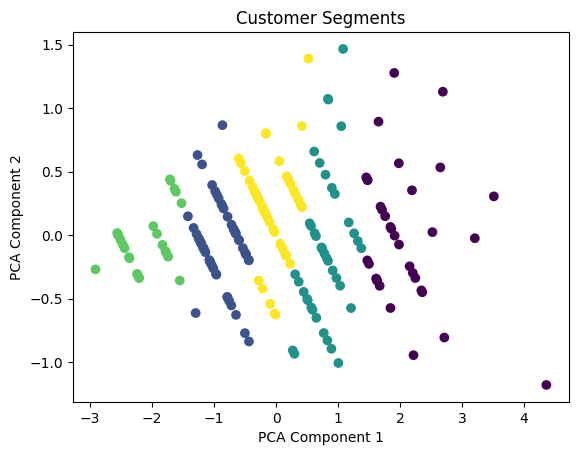

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
# Install required libraries if not already installed
!pip install pandas matplotlib seaborn scikit-learn fpdf

# Load datasets
customers = pd.read_csv('https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE')
transactions = pd.read_csv('https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF')

# Feature engineering
customer_features = (
    transactions.groupby('CustomerID')
    .agg({'TotalValue': 'sum', 'TransactionID': 'count'})
    .rename(columns={'TotalValue': 'TotalSpent', 'TransactionID': 'NumTransactions'})
)

# Merge with customer data
customer_data = customers.set_index('CustomerID').join(customer_features).fillna(0)

# Normalize features
numeric_features = ['TotalSpent', 'NumTransactions']
customer_data_normalized = (customer_data[numeric_features] - customer_data[numeric_features].mean()) / customer_data[numeric_features].std()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(customer_data_normalized)

# Evaluate clustering
db_index = davies_bouldin_score(customer_data_normalized, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Visualize clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(customer_data_normalized)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Save clustering results
clustering_report = {
    'Number of Clusters': 5,
    'DB Index': db_index,
}

